In [2]:
##### Training Data
import pandas as pd

training = pd.read_csv("/content/drive/My Drive/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
print(training.shape)

# Get target variable
y_train = training['sentiment']
x_train = training.drop(["sentiment"], axis=1)

training.head()
x_train.head()
y_train.head()

(25000, 3)


0    1
1    1
2    0
3    0
4    1
Name: sentiment, dtype: int64

In [4]:
##### Data exploration
# We check if the training dataset is balanced.
y_train.value_counts()

sentiment
1    12500
0    12500
Name: count, dtype: int64

In [5]:
###############################
##### Data pre-processing #####
###############################

import nltk
import numpy as np
import matplotlib.pyplot as plt

# Import list of stopwords from library NLTK
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
############################
##### Remove Stopwords #####
############################

stopwords_list = stopwords.words("english")
print(f'List of stopwords:\n{stopwords_list}\n')


# We remove negation words in list of stopwords
no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)

print(f'Final list of stopwords:\n{stopwords_list}')

List of stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sam

In [7]:
#############################
##### Lemmatize reviews #####
#############################

# Import Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# function that receive a list of words and do lemmatization:
def lemma_stem_text(words_list):
    # Lemmatizer
    text = [lemmatizer.lemmatize(token.lower()) for token in words_list] # eighties->eight or messages->message or drugs->drug
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text ]# going-> go or started->start or watching->watch
    return text

word_example = "feet"
print(f'The word "{word_example}" is transformed to "{lemma_stem_text([word_example])[0]}"')

[nltk_data] Downloading package wordnet to /root/nltk_data...


The word "feet" is transformed to "foot"


In [8]:
###########################
##### Review Cleaning #####
###########################

# create a function to clean the text of a review using the functions defined previously.

# Import function BeautifulSoup to clean text of HTML tags
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def review_to_words(raw_review):
    # 1. Remove HTML tags
    review_text = BeautifulSoup(raw_review).get_text()

    # 2. Transform abbreviated negations to the standard form.
    review_text = negation_abbreviated_to_standard(review_text)

    # 3. Remove non-letters and non-numbers
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(review_text)

    # 4. Remove stop words
    meaningful_words = [w for w in words if w.lower() not in stopwords_list]

    # 5. Apply lemmatization function
    lemma_words = lemma_stem_text(meaningful_words)

    # 6. Join the words back into one string separated by space, and return the result.
    return( " ".join(lemma_words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
#################################
##### Clean for ALL reviews #####
#################################
import re
re_negation = re.compile("n't ") # specify a pattern you want to find in a string

# function that receive a sequence of words and return the same sequence transforming
# abbreviated negations to the standard form.
def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

# We get the text of reviews in the training set
reviews = x_train['review']

# We initialize an empty list to add the clean reviews
cleaned_train_reviews = []

# We loop over each review and clean it
for i in reviews:
    cleaned_train_reviews.append(review_to_words(i))

<ipython-input-8-595a4f7ddf88>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()
<ipython-input-8-595a4f7ddf88>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()
<ipython-input-8-595a4f7ddf88>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


Q1. Try with unigram TF-IDF matrix and check its accuracy on the validation set

In [10]:
###################################################
# Vectorization: Create Unigram TF-IDF matrix #####
###################################################

# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Define some hyperparameters of encoded
vectorizer1 = TfidfVectorizer(max_features=25000, ngram_range = (1,1))

# Create the training set with the words encoded as features of the reviews
train_data_features1 = vectorizer1.fit_transform(cleaned_train_reviews)

In [11]:
print("Shapes before train-test split:")
print("train_data_features shape:", train_data_features1.shape)
print("y_train length:", len(y_train))

Shapes before train-test split:
train_data_features shape: (25000, 25000)
y_train length: 25000


In [12]:
# We split train dataset to create validation set and training the Logistic Regression Model on validation set
from sklearn.model_selection import train_test_split
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(train_data_features1, y_train, test_size=0.2,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
logistic1 = LogisticRegression(random_state=0)
# Train the model
logistic1 = logistic1.fit(X_train1, Y_train1)
# Print score of model(using validation dataset)
print(logistic1.score(X_val1, Y_val1)) # accuracy

0.893


In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred_logistic1  = logistic1.predict(X_val1)
confusion_matrix_logistic1 = confusion_matrix(Y_val1, Y_pred_logistic1, labels=[1,0])
confusion_matrix_logistic1

array([[2219,  233],
       [ 302, 2246]])

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

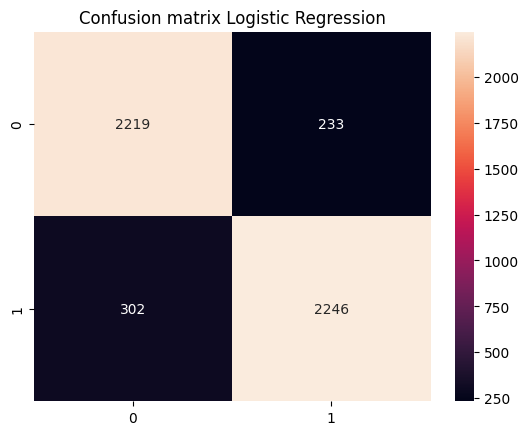

In [15]:
# plot the confusion matrix
import seaborn as sns
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic1, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

Try with bigram TF-IDF matrix and check its accuracy on the validation set

In [16]:
##################################################
# Vectorization: Create Bigram TF-IDF matrix #####
##################################################

# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Define some hyperparameters of encoded
vectorizer2 = TfidfVectorizer(max_features=25000, ngram_range = (2,2))

# Create the training set with the words encoded as features of the reviews
train_data_features2 = vectorizer2.fit_transform(cleaned_train_reviews)

In [17]:
print("Shapes before train-test split:")
print("train_data_features shape:", train_data_features2.shape)
print("y_train length:", len(y_train))

Shapes before train-test split:
train_data_features shape: (25000, 25000)
y_train length: 25000


In [18]:
# We split train dataset to create validation set and training the Logistic Regression Model on validation set
from sklearn.model_selection import train_test_split
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(train_data_features2, y_train, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
logistic2 = LogisticRegression(random_state=0)
# Train the model
logistic2 = logistic2.fit(X_train2, Y_train2)
# Print score of model(using validation dataset)
print(logistic2.score(X_val2, Y_val2)) # accuracy

0.8636


In [20]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred_logistic2  = logistic2.predict(X_val2)
confusion_matrix_logistic2 = confusion_matrix(Y_val2, Y_pred_logistic2, labels=[1,0])
confusion_matrix_logistic2

array([[2188,  264],
       [ 418, 2130]])

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

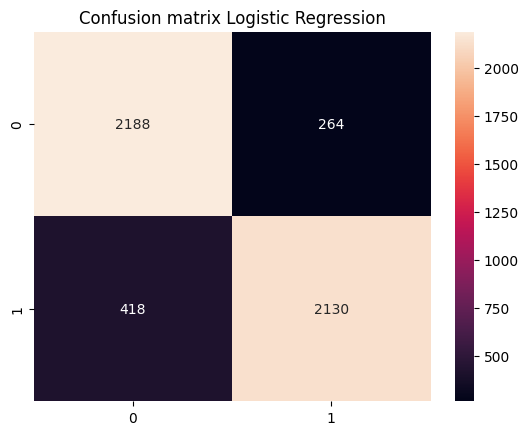

In [21]:
# plot the confusion matrix
import seaborn as sns
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic2, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

Q2. Try with Bigram Document Term matrix(DTM) and check its accuracy on the validation set.

In [22]:
#########################################################
# Vectorization: Create Bigram Document Term Matrix #####
#########################################################

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for Bigrams
c2 = CountVectorizer(stop_words='english', lowercase=True, token_pattern=r'\w+', max_features=25000, ngram_range=(2, 2))

# Fit and transform y_train to generate the Bigram DTM
bigram_dtm_matrix = c2.fit_transform(cleaned_train_reviews)

train_data_features4 = bigram_dtm_matrix

In [23]:
print("Shapes before train-test split:")
print("train_data_features shape:", train_data_features4.shape)
print("y_train length:", len(y_train))

Shapes before train-test split:
train_data_features shape: (25000, 25000)
y_train length: 25000


In [24]:
# We split train dataset to create validation set and training the Logistic Regression Model on validation set
from sklearn.model_selection import train_test_split
X_train4, X_val4, Y_train4, Y_val4 = train_test_split(train_data_features4, y_train, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
logistic4 = LogisticRegression(random_state=0,max_iter=1000)
# Train the model
logistic4 = logistic4.fit(X_train4, Y_train4)
# Print score of model(using validation dataset)
print(logistic4.score(X_val4, Y_val4)) # accuracy

0.8382


In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred_logistic4  = logistic4.predict(X_val4)
confusion_matrix_logistic4 = confusion_matrix(Y_val4, Y_pred_logistic4, labels=[1,0])
confusion_matrix_logistic4

array([[2083,  369],
       [ 440, 2108]])

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

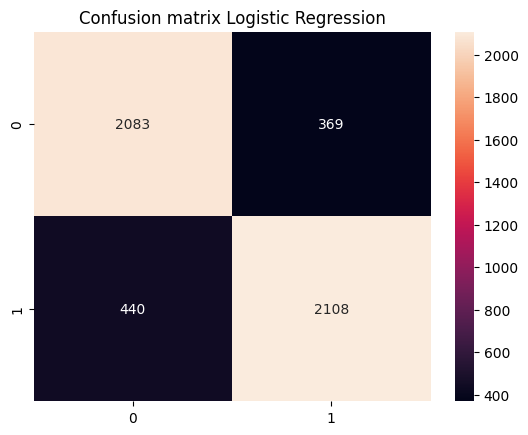

In [27]:
# plot the confusion matrix
import seaborn as sns
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic4, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

Q3. Try with unigram Document Term matrix(DTM) and check its accuracy on the validation set

In [28]:
#########################################################
# Vectorization: Create Unigram Document Term Matrix #####
#########################################################

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for unigrams
c1 = CountVectorizer(stop_words='english', lowercase=True, token_pattern=r'\w+', max_features=25000, ngram_range=(1, 1))

# Fit and transform y_train to generate the unigram DTM
unigram_dtm_matrix = c1.fit_transform(cleaned_train_reviews)

train_data_features3 = unigram_dtm_matrix

In [29]:
print("Shapes before train-test split:")
print("train_data_features shape:", train_data_features3.shape)
print("y_train length:", len(y_train))

Shapes before train-test split:
train_data_features shape: (25000, 25000)
y_train length: 25000


In [30]:
# We split train dataset to create validation set and training the Logistic Regression Model on validation set
from sklearn.model_selection import train_test_split
X_train3, X_val3, Y_train3, Y_val3 = train_test_split(train_data_features3, y_train, test_size=0.2, random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
logistic3 = LogisticRegression(random_state=0,max_iter=1000)
# Train the model
logistic3 = logistic3.fit(X_train3, Y_train3)
# Print score of model(using validation dataset)
print(logistic3.score(X_val3, Y_val3)) # accuracy

0.8676


In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred_logistic3  = logistic3.predict(X_val3)
confusion_matrix_logistic3 = confusion_matrix(Y_val3, Y_pred_logistic3, labels=[1,0])
confusion_matrix_logistic3

array([[2143,  309],
       [ 353, 2195]])

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

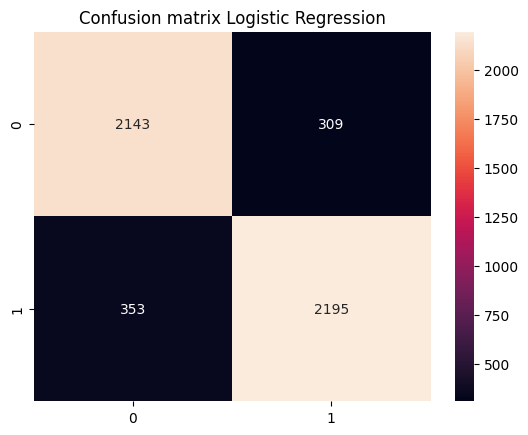

In [33]:
# plot the confusion matrix
import seaborn as sns
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic3, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

Q4. Repeat Q1, Q2, Q3 for 2 more different random_state numbers and report accuracy for each case. (e.g. change random_state = 0 to random_state = 1111)

Unigram TF-IDF with random_state = 99 & 699

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#split the data with different random numbers i.e.random_state = 99 & 699
X_train11, X_val11, Y_train11, Y_val11 = train_test_split(train_data_features1, y_train, test_size=0.2, random_state=99)
X_train12, X_val12, Y_train12, Y_val12 = train_test_split(train_data_features1, y_train, test_size=0.2, random_state=699)

# Initialize a logistic regression model with random_state = 99 & 699
#There isn't any change in accuracy by changing the random_state number in logistic regression line
# To avoid confusion i used the same number in both the cases for every model
logistic11 = LogisticRegression(random_state=99)
logistic12 = LogisticRegression(random_state=699)

# Train the model
logistic11 = logistic11.fit(X_train11, Y_train11)
logistic12 = logistic12.fit(X_train12, Y_train12)

# Print score of model(using validation dataset)
print("Unigram TF-IDF : Accuracy with random_state number 99 is :", logistic11.score(X_val11, Y_val11)) # accuracy
print("Unigram TF-IDF : Accuracy with random_state number 699 is :", logistic12.score(X_val12, Y_val12)) # accuracy

Unigram TF-IDF : Accuracy with random_state number 99 is : 0.8836
Unigram TF-IDF : Accuracy with random_state number 699 is : 0.89


Bigram TF-IDF with random_state = 99 & 699

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#split the data with different random numbers i.e.random_state = 99 & 699
X_train21, X_val21, Y_train21, Y_val21 = train_test_split(train_data_features2, y_train, test_size=0.2, random_state=99)
X_train22, X_val22, Y_train22, Y_val22 = train_test_split(train_data_features2, y_train, test_size=0.2, random_state=699)

# Initialize a logistic regression model with random_state = 99 & 699
logistic21 = LogisticRegression(random_state=99)
logistic22 = LogisticRegression(random_state=699)

# Train the model
logistic21 = logistic21.fit(X_train21, Y_train21)
logistic22 = logistic22.fit(X_train22, Y_train22)

# Print score of model(using validation dataset)
print("Bigram TF-IDF : Accuracy with random_state number 99 is :", logistic21.score(X_val21, Y_val21)) # accuracy
print("Bigram TF-IDF : Accuracy with random_state number 699 is :", logistic22.score(X_val22, Y_val22)) # accuracy

Bigram TF-IDF : Accuracy with random_state number 99 is : 0.8586
Bigram TF-IDF : Accuracy with random_state number 699 is : 0.8572


Unigram Document Term Matrix(DTM) with random_state = 99 & 699

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#split the data with different random numbers i.e.random_state = 99 & 699
X_train31, X_val31, Y_train31, Y_val31 = train_test_split(train_data_features3, y_train, test_size=0.2, random_state=99)
X_train32, X_val32, Y_train32, Y_val32 = train_test_split(train_data_features3, y_train, test_size=0.2, random_state=699)

# Initialize a logistic regression model with random_state = 99 & 699
logistic31 = LogisticRegression(random_state=99,max_iter=1000)
logistic32 = LogisticRegression(random_state=699,max_iter=1000)

# Train the model
logistic31 = logistic31.fit(X_train31, Y_train31)
logistic32 = logistic32.fit(X_train32, Y_train32)

# Print score of model(using validation dataset)
print("Unigram DTM : Accuracy with random_state number 99 is :", logistic31.score(X_val31, Y_val31)) # accuracy
print("Unigram DTM : Accuracy with random_state number 699 is :", logistic32.score(X_val32, Y_val32)) # accuracy

Unigram DTM : Accuracy with random_state number 99 is : 0.8746
Unigram DTM : Accuracy with random_state number 218 is : 0.8736


Bigram Document Term Matrix(DTM) with random_state = 99 & 699

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#split the data with different random numbers i.e.random_state = 99 & 699
X_train41, X_val41, Y_train41, Y_val41 = train_test_split(train_data_features4, y_train, test_size=0.2, random_state=99)
X_train42, X_val42, Y_train42, Y_val42 = train_test_split(train_data_features4, y_train, test_size=0.2, random_state=699)

# Initialize a logistic regression model with random_state = 99 & 699
logistic41 = LogisticRegression(random_state=99,max_iter=1000)
logistic42 = LogisticRegression(random_state=699,max_iter=1000)

# Train the model
logistic41 = logistic41.fit(X_train41, Y_train41)
logistic42 = logistic42.fit(X_train42, Y_train42)

# Print score of model(using validation dataset)
print(" Bigram DTM : Accuracy with random_state number 99 is :", logistic41.score(X_val41, Y_val41)) # accuracy
print("Bigram DTM : Accuracy with random_state number 699 is :", logistic42.score(X_val42, Y_val42)) # accuracy

 Bigram DTM : Accuracy with random_state number 99 is : 0.8426
Bigram DTM : Accuracy with random_state number 699 is : 0.834
